In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

# EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/8899/creditcard_2023.csv')
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486122,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


<ipython-input-6-a1cecd2c1da1>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=fig)


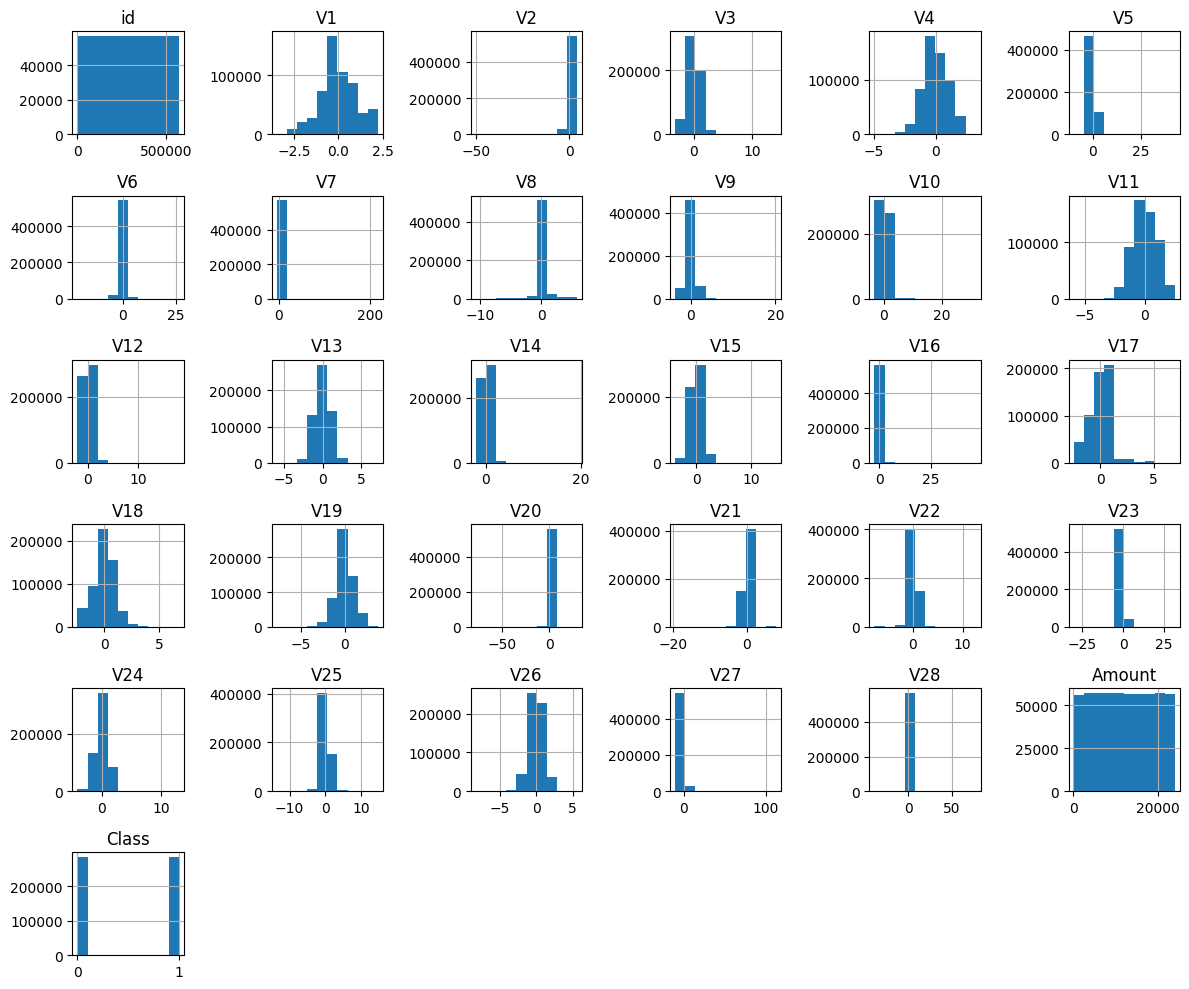

In [ ]:
fig = plt.figure(figsize=(12,10))
df.hist(ax=fig)
plt.tight_layout()

In [ ]:
print(sum(df.isna().sum()))

0


Class
0    284315
1    284315
Name: count, dtype: int64


<Axes: >

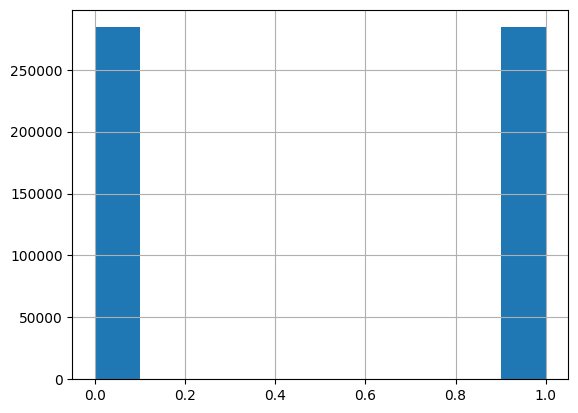

In [ ]:
print(df['Class'].value_counts())
df['Class'].hist()

# Data Wrangling

In [ ]:
random_state = 123
features = [col for col in df.columns if col not in ['id', 'Class']]
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Class'], test_size=0.3, random_state=random_state, stratify=df['Class'], shuffle=True)
# features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# helper functions

In [ ]:
def show_model_results(model):
    pred = model.predict(X_test)
    pred = np.where(pred > 0.5, 1, 0)
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def plot_history(history):
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss`
        # is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined
        # as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further
        # defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

# Basic Deep Neural Network

In [ ]:
print(y_train[:5])

325383    1
477277    1
70496     0
361975    1
362843    1
Name: Class, dtype: int64


In [ ]:
def create_simple_nnmodel(neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
622/622 [==============================] - 4s 6ms/step - loss: 0.1728 - accuracy: 0.9351 - val_loss: 0.1040 - val_accuracy: 0.9580
Epoch 2/10
622/622 [==============================] - 4s 7ms/step - loss: 0.0882 - accuracy: 0.9649 - val_loss: 0.0785 - val_accuracy: 0.9683
Epoch 3/10
622/622 [==============================] - 4s 6ms/step - loss: 0.0682 - accuracy: 0.9735 - val_loss: 0.0618 - val_accuracy: 0.9761
Epoch 4/10
622/622 [==============================] - 4s 6ms/step - loss: 0.0544 - accuracy: 0.9789 - val_loss: 0.0500 - val_accuracy: 0.9802
Epoch 5/10
622/622 [==============================] - 4s 7ms/step - loss: 0.0440 - accuracy: 0.9837 - val_loss: 0.0408 - val_accuracy: 0.9850
Epoch 6/10
622/622 [==============================] - 2s 2ms/step - loss: 0.0365 - accuracy: 0.9873 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 7/10
622/622 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0292 - val_accuracy: 0.9910
Epoch 

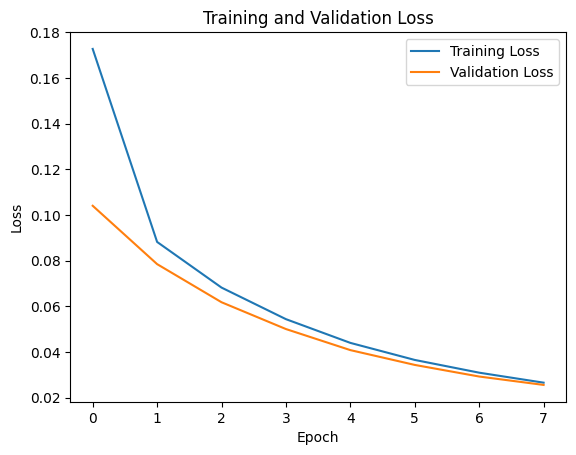

In [ ]:
start_time = time.time()
nn_model = create_simple_nnmodel(len(features))
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

In [ ]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                870       
                                                                 
 dense_1 (Dense)             (None, 1)                 30        
                                                                 
Total params: 900 (3.52 KB)
Trainable params: 900 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5331/5331 [==============================] - 7s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85295
           1       0.99      0.99      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



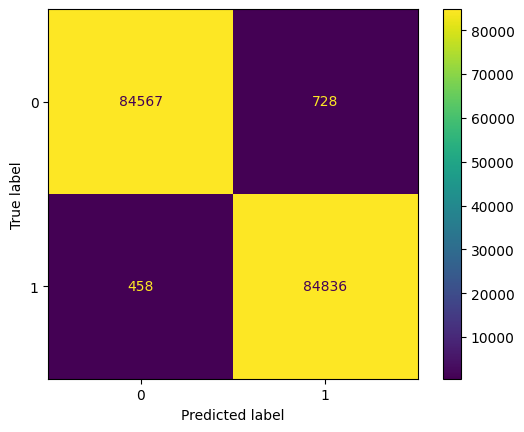

In [ ]:
show_model_results(nn_model)

# Deep RNN model

In [ ]:
def create_deep_nnmodel(neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
622/622 [==============================] - 5s 5ms/step - loss: 0.1339 - accuracy: 0.9483 - val_loss: 0.0437 - val_accuracy: 0.9838
Epoch 2/10
622/622 [==============================] - 4s 7ms/step - loss: 0.0346 - accuracy: 0.9884 - val_loss: 0.0194 - val_accuracy: 0.9936
Epoch 3/10
622/622 [==============================] - 3s 5ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0112 - val_accuracy: 0.9968
Epoch 4/10
622/622 [==============================] - 3s 5ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 5/10
622/622 [==============================] - 3s 4ms/step - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.0058 - val_accuracy: 0.9988
Epoch 6/10
622/622 [==============================] - 4s 6ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 6: early stopping
training time: 22.09 seconds


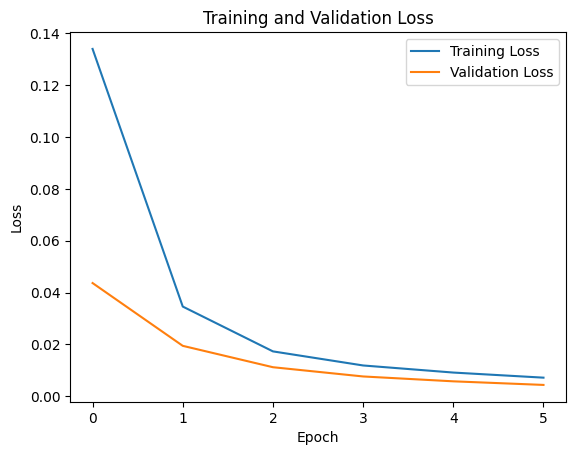

In [ ]:
start_time = time.time()
deep_nn_model = create_deep_nnmodel(len(features))
history = deep_nn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

5331/5331 [==============================] - 12s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



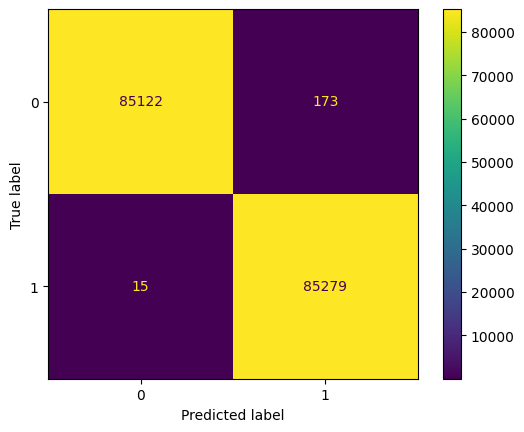

In [ ]:
show_model_results(deep_nn_model)

In [ ]:
deep_nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 29)                870       
                                                                 
 dense_6 (Dense)             (None, 64)                1920      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)               